In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from ucimlrepo import fetch_ucirepo

In [4]:
car_evaluation = fetch_ucirepo(id=19) 

In [5]:
df = pd.DataFrame(data = car_evaluation.data.original)

In [6]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [8]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [13]:
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [7]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [14]:
labels = []
for i in df.select_dtypes(include='object').columns.to_list():
    labels.append(i)

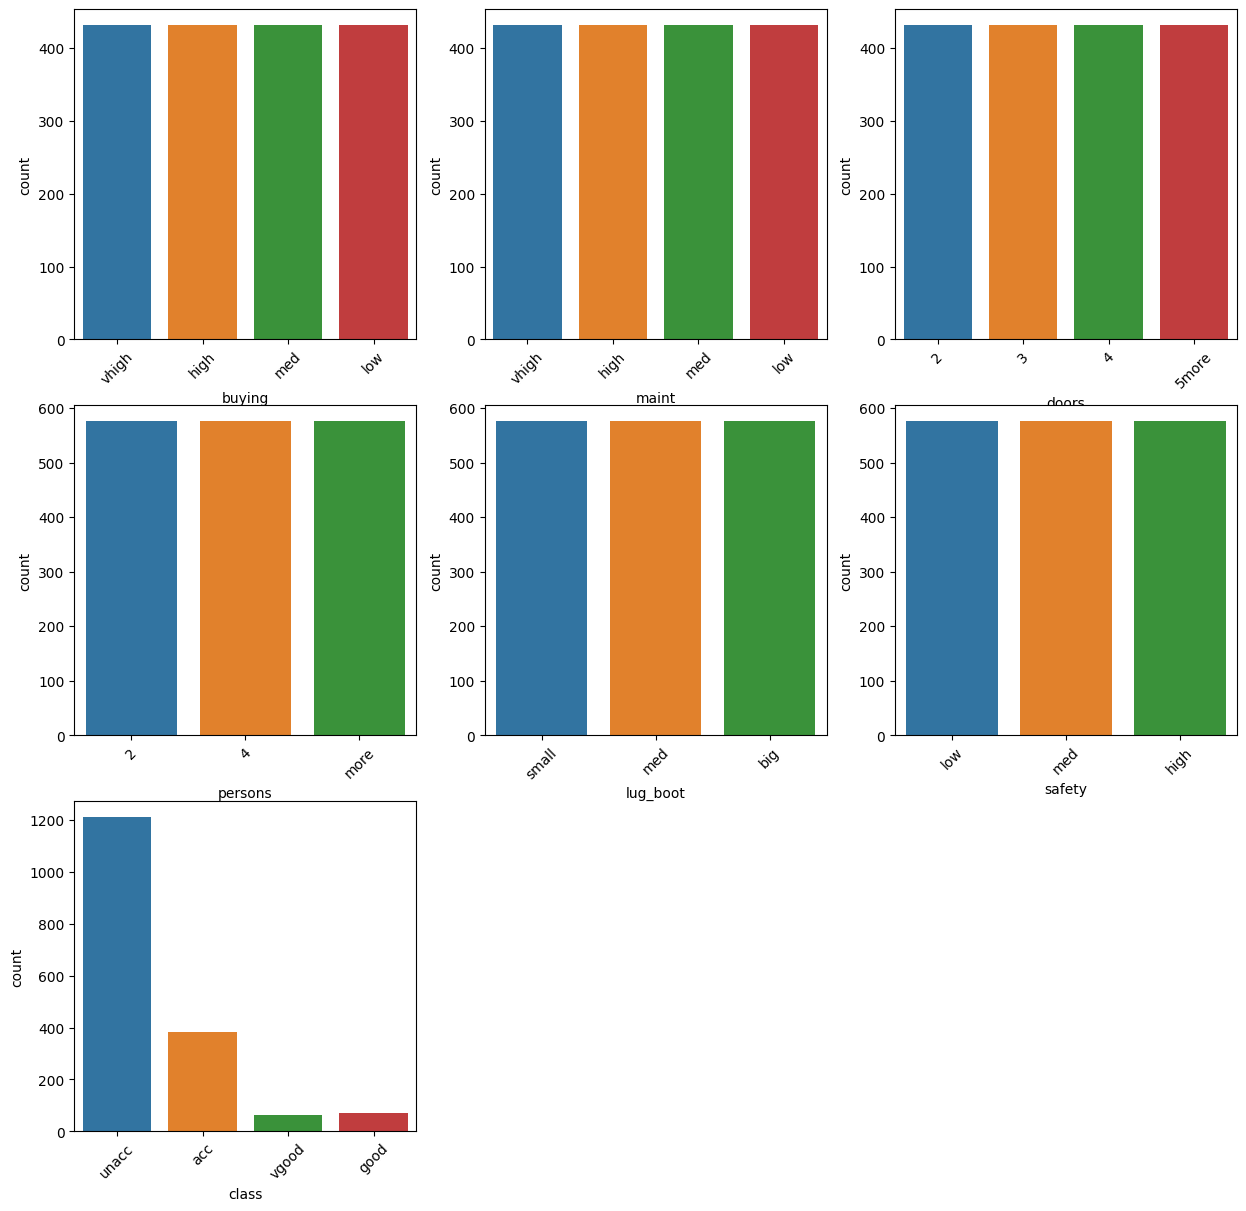

In [15]:
plt.figure(figsize = (15, 30))
for i in enumerate(labels):
    plt.subplot(6, 3,i[0]+1)
    sns.countplot(x= i[1], data = df)
    plt.xticks(rotation = 45)

In [16]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [17]:
df['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [18]:
df.loc[df['class'] == 'unacc', 'class'] = 0
df.loc[df['class'] == 'acc', 'class'] = 1
df.loc[df['class'] == 'vgood', 'class'] = 2
df.loc[df['class'] == 'good', 'class'] = 3

In [21]:
df['class'] = df['class'].astype(int)

In [22]:
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class        int32
dtype: object

In [23]:
import category_encoders as ce

In [24]:
ce_OHE = ce.OneHotEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']) 
data = ce_OHE.fit_transform(df)
data.head()

,buying_1,buying_2,buying_3,buying_4,maint_1,maint_2,maint_3,maint_4,doors_1,doors_2,...,persons_1,persons_2,persons_3,lug_boot_1,lug_boot_2,lug_boot_3,safety_1,safety_2,safety_3,class
0,1,0,0,0,1,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0
1,1,0,0,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
2,1,0,0,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
3,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0


In [25]:
X = data.drop(["class"], axis=1) 
y = df["class"]

In [26]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1) 

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
rf = DecisionTreeClassifier()


rf.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
print("model score: %.3f" % rf.score(X_test, y_test))

model score: 0.971


In [30]:
Y_previsto = rf.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, Y_previsto)

0.046242774566473986

In [33]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, Y_previsto)

0.03468208092485549

In [64]:
from sklearn import metrics

In [72]:
y_test.value_counts()

class
0    260
1     59
3     14
2     13
Name: count, dtype: int64

In [65]:
print(metrics.classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       260
           1       0.88      0.98      0.93        59
           2       1.00      0.85      0.92        13
           3       0.92      0.86      0.89        14

    accuracy                           0.97       346
   macro avg       0.95      0.92      0.93       346
weighted avg       0.97      0.97      0.97       346



In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR

In [63]:
def analises(models, X_test, y_test):
    #models, mean_squared_error, mean_absolute_error = models.score(X_test, y_test), mean_squared_error(y_test, Y_previsto), mean_absolute_error(y_test, Y_previsto)
    models.fit(X_test, y_test)
    scores = models.score(X_test, y_test)
    Y_previsto = models.predict(X_test)
    mean_sq_error = mean_squared_error(y_test, Y_previsto)
    mean_ab_error = mean_absolute_error(y_test, Y_previsto)
    #return( models, mean_squared_error, mean_absolute_error )
    return scores, mean_sq_error , mean_ab_error 

models = [LinearRegression(),
             Ridge(),
             SVR(),
             RandomForestRegressor(),
             GradientBoostingRegressor(),
             KNeighborsRegressor(n_neighbors = 4),]

names = ['LR','Ridge','svm','GNB','RF','GB','KNN']

for model, names in zip(models, names):
   scores = analises(model, X_test, y_test)
   print("{}    : Acurácia: {:.4f}, Erro quadrado: {:4f}, Erro absoluto: {:4f}".format(names, scores[0], scores[1],scores[2]))

LR    : Acurácia: 0.4663, Erro quadrado: 0.293657, Erro absoluto: 0.394650
Ridge    : Acurácia: 0.4775, Erro quadrado: 0.287485, Erro absoluto: 0.391174
svm    : Acurácia: 0.8499, Erro quadrado: 0.082591, Erro absoluto: 0.142905
GNB    : Acurácia: 0.9729, Erro quadrado: 0.014887, Erro absoluto: 0.048353
RF    : Acurácia: 0.8937, Erro quadrado: 0.058507, Erro absoluto: 0.154401
GB    : Acurácia: 0.7495, Erro quadrado: 0.137825, Erro absoluto: 0.191474
